In [1]:
import pandas as pd       
import os 
import math 
import numpy as np
import matplotlib.pyplot as plt  

In [2]:
import os

# Folder path
folder_path = r"C:\Users\sehja\Downloads\untitled Folder2\archive 11\recordings\recordings"

# Initialize the count
mp3_count = 0

# Iterate over files in the folder
for filename in os.listdir(folder_path):
    # Check if the file is an MP3 audio file
    if filename.endswith(".mp3"):
        mp3_count += 1

print(f"Number of MP3 files in the folder: {mp3_count}")

Number of MP3 files in the folder: 2138


In [3]:
df = pd.read_csv(r"C:\Users\sehja\Downloads\untitled Folder2\archive 11\speakers_all.csv")

In [4]:
df

age  age_onset              birthplace  filename native_language  \
0     24.0       12.0         koussi, senegal   balanta         balanta   
1     18.0       10.0          buea, cameroon  cameroon        cameroon   
2     48.0        8.0  hong, adamawa, nigeria  fulfulde        fulfulde   
3     42.0       42.0   port-au-prince, haiti   haitian         haitian   
4     40.0       35.0   port-au-prince, haiti   haitian         haitian   
...    ...        ...                     ...       ...             ...   
2167  46.0        5.0          lagos, nigeria   yoruba3          yoruba   
2168  46.0       12.0          lagos, nigeria   yoruba4          yoruba   
2169  47.0        2.0         ibadan, nigeria   yoruba5          yoruba   
2170  31.0        1.0     bethel, alaska, usa    yupik1           yupik   
2171  24.0       14.0      bulawayo, zimbabwe     zulu1            zulu   

         sex  speakerid   country  file_missing?  Unnamed: 9  Unnamed: 10  \
0       male        788   senegal           True         NaN          NaN   
1       male       1953  cameroon           True         NaN          NaN   
2       male       1037   nigeria           True         NaN          NaN   
3       male       1165     haiti           True         NaN          NaN   
4       male       1166     haiti           True         NaN          NaN   
...      ...        ...       ...            ...         ...          ...   
2167  female        766   nigeria          False         NaN          NaN   
2168    male        851   nigeria          False         NaN          NaN   
2169  female       2023   nigeria          False         NaN          NaN   
2170  female        571       usa          False         NaN          NaN   
2171  female        406  zimbabwe          False         NaN          NaN   

     Unnamed: 11  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  
...          ...  
2167         NaN  
2168         NaN  
2169         NaN  
2170         NaN  
2171         NaN  

[2172 rows x 12 columns]

In [5]:
df.drop(df.columns[9:12],axis = 1, inplace = True)
print(df.columns)
df.head()

Index(['age', 'age_onset', 'birthplace', 'filename', 'native_language', 'sex',
       'speakerid', 'country', 'file_missing?'],
      dtype='object')


age  age_onset              birthplace  filename native_language   sex  \
0  24.0       12.0         koussi, senegal   balanta         balanta  male   
1  18.0       10.0          buea, cameroon  cameroon        cameroon  male   
2  48.0        8.0  hong, adamawa, nigeria  fulfulde        fulfulde  male   
3  42.0       42.0   port-au-prince, haiti   haitian         haitian  male   
4  40.0       35.0   port-au-prince, haiti   haitian         haitian  male   

   speakerid   country  file_missing?  
0        788   senegal           True  
1       1953  cameroon           True  
2       1037   nigeria           True  
3       1165     haiti           True  
4       1166     haiti           True

In [6]:
import pandas as pd

# Adjust display options
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)     # Show all rows
pd.set_option('display.max_colwidth', None) # Show full column width

# File path
file_path = r"C:\Users\sehja\Downloads\untitled Folder2\archive 11\reading-passage.txt"

# Read the text file into a DataFrame
df1 = pd.read_csv(file_path, delimiter='\t', header=None, names=['Column'])

# Print the entire text
print(df1['Column'].to_string(index=False))

Please call Stella.  Ask her to bring these things with her from the store:  Six spoons of fresh snow peas, five thick slabs of blue cheese, and maybe a snack for her brother Bob.  We also need a small plastic snake and a big toy frog for the kids.  She can scoop these things into three red bags, and we will go meet her Wednesday at the train station.


In [7]:
# import os
# import langdetect

# # Folder path
# folder_path = r"C:\Users\sehja\Downloads\untitled Folder2\archive 11\recordings\recordings"

# # Iterate over files in the folder
# for filename in os.listdir(folder_path):
#     # Check if the file is an MP3 audio file
#     if filename.endswith(".mp3"):
#         # Determine the language of the file name
#         language = langdetect.detect(filename)

#         # Print the language of the file name
#         print(f"The language of {filename} is {language}")


In [8]:
import os
import langdetect

# Folder path
folder_path = r"C:\Users\sehja\Downloads\untitled Folder2\archive 11\recordings\recordings"

# Initialize a dictionary to store the language counts
language_counts = {}

# Iterate over files in the folder
for filename in os.listdir(folder_path):
    # Check if the file is an MP3 audio file
    if filename.endswith(".mp3"):
        # Determine the language of the file name
        language = langdetect.detect(filename)

        # Increment the count for the language in the dictionary
        language_counts[language] = language_counts.get(language, 0) + 1

# Sort the language counts in descending order
sorted_counts = sorted(language_counts.items(), key=lambda x: x[1], reverse=True)

# Print the top 10 languages
print("Top 10 Languages:")
for language, count in sorted_counts[:10]:
    print(f"Language: {language}, Count: {count}")


Top 10 Languages:
Language: en, Count: 872
Language: id, Count: 304
Language: tl, Count: 139
Language: ca, Count: 126
Language: sq, Count: 96
Language: af, Count: 70
Language: ro, Count: 68
Language: sw, Count: 67
Language: it, Count: 59
Language: pt, Count: 53


In [9]:
import os
import numpy as np
import librosa

folder_path = r"C:\Users\sehja\Downloads\untitled Folder2\archive 11\recordings\recordings"

# List all files in the folder
file_list = os.listdir(folder_path)

# Initialize a list to store the SNR values
snr_values = []

# Iterate over each file
for file_name in file_list:
    # Construct the full path to the file
    file_path = os.path.join(folder_path, file_name)

    try:
        # Load the audio file
        audio, sr = librosa.load(file_path)

        # Define a portion of the audio as noise-free (e.g., the beginning or a silent section)
        noise_free_audio = audio[:50000]  # Adjust the number of samples as needed

        # Calculate the power of the noise-free audio
        noise_free_power = np.mean(np.square(noise_free_audio))

        # Calculate the power of the entire audio signal
        signal_power = np.mean(np.square(audio))

        # Calculate SNR in decibels (dB)
        snr = 10 * np.log10(signal_power / noise_free_power)

        # Append the SNR value to the list
        snr_values.append(snr)

    except Exception as e:
        print(f"Error processing file: {file_name}, {e}")

# Check if the snr_values list is not empty
if snr_values:
    # Calculate descriptive statistics
    mean_snr = np.mean(snr_values)
    median_snr = np.median(snr_values)
    std_snr = np.std(snr_values)
    min_snr = np.min(snr_values)
    max_snr = np.max(snr_values)

    # Print the results
    print("Mean SNR:", mean_snr)
    print("Median SNR:", median_snr)
    print("Standard Deviation of SNR:", std_snr)
    print("Minimum SNR:", min_snr)
    print("Maximum SNR:", max_snr)
else:
    print("No SNR values found.")

Mean SNR: -0.31225539989658585
Median SNR: -0.4814906418323517
Standard Deviation of SNR: 2.4096269450236845
Minimum SNR: -7.27400541305542
Maximum SNR: 29.167368412017822


In [10]:
import os
import numpy as np
import librosa
import langdetect

folder_path = r"C:\Users\sehja\Downloads\untitled Folder2\archive 11\recordings\recordings"

# List all files in the folder
file_list = os.listdir(folder_path)

# Initialize a list to store the SNR values with file names and languages
snr_info = []

# Iterate over each file
for file_name in file_list:
    # Construct the full path to the file
    file_path = os.path.join(folder_path, file_name)

    try:
        # Load the audio file
        audio, sr = librosa.load(file_path)

        # Define a portion of the audio as noise-free (e.g., the beginning or a silent section)
        noise_free_audio = audio[:50000]  # Adjust the number of samples as needed

        # Calculate the power of the noise-free audio
        noise_free_power = np.mean(np.square(noise_free_audio))

        # Calculate the power of the entire audio signal
        signal_power = np.mean(np.square(audio))

        # Calculate SNR in decibels (dB)
        snr = 10 * np.log10(signal_power / noise_free_power)

        # Detect the language of the file name
        lang = langdetect.detect(file_name)

        # Append the SNR value with file name and language to the list
        snr_info.append((file_name, snr, lang))

    except Exception as e:
        print(f"Error processing file: {file_name}, {e}")

# Check if the snr_info list is not empty
if snr_info:
    # Sort the SNR values in descending order
    sorted_snr_info = sorted(snr_info, key=lambda x: x[1], reverse=True)

    # Print the top 10 SNR values with file names and languages
    print("Top 10 SNR Values:")
    for i, (file_name, snr, lang) in enumerate(sorted_snr_info[:10]):
        print(f"{i+1}. File: {file_name}, SNR: {snr} dB, Language: {lang}")
else:
    print("No SNR values found.")

Top 10 SNR Values:
1. File: punjabi8.mp3, SNR: 29.167368412017822 dB, Language: id
2. File: spanish159.mp3, SNR: 28.79537343978882 dB, Language: en
3. File: dari4.mp3, SNR: 23.083226680755615 dB, Language: id
4. File: urdu1.mp3, SNR: 22.65960931777954 dB, Language: ro
5. File: vietnamese15.mp3, SNR: 21.805834770202637 dB, Language: af
6. File: mongolian7.mp3, SNR: 18.06862235069275 dB, Language: tl
7. File: fanti2.wav, SNR: 17.50997543334961 dB, Language: sw
8. File: fanti2.mp3, SNR: 17.509968280792236 dB, Language: it
9. File: mandarin42.mp3, SNR: 15.300025939941406 dB, Language: id
10. File: polish17.mp3, SNR: 12.164506912231445 dB, Language: sq


In [11]:
import os
import numpy as np
import langdetect

folder_path = r"C:\Users\sehja\Downloads\untitled Folder2\archive 11\recordings\recordings"

# List all files in the folder
file_list = os.listdir(folder_path)

# Create a dictionary to store language-wise SNR values
language_snr = {}

# Iterate over each file
for file_name in file_list:
    # Extract language from file name using langdetect
    language = langdetect.detect(file_name)

    try:
        # Load the audio file
        audio, sr = librosa.load(os.path.join(folder_path, file_name))

        # Define a portion of the audio as noise-free
        noise_free_audio = audio[:50000]  # Adjust the number of samples as needed

        # Calculate the power of the noise-free audio
        noise_free_power = np.mean(np.square(noise_free_audio))

        # Calculate the power of the entire audio signal
        signal_power = np.mean(np.square(audio))

        # Calculate SNR in decibels (dB)
        snr = 10 * np.log10(signal_power / noise_free_power)

        # Add SNR to the language_snr dictionary
        if language in language_snr:
            language_snr[language].append(snr)
        else:
            language_snr[language] = [snr]

    except Exception as e:
        print(f"Error processing file: {file_name}, {e}")

# Print the SNR statistics for each language
for language, snr_values in language_snr.items():
    print(f"Language: {language}")
    print(f"Mean SNR: {np.mean(snr_values)}")
    print(f"Median SNR: {np.median(snr_values)}")
    print(f"Standard Deviation of SNR: {np.std(snr_values)}")
    print(f"Minimum SNR: {np.min(snr_values)}")
    print(f"Maximum SNR: {np.max(snr_values)}")
    print("--------------------")

Language: af
Mean SNR: -0.3113065439206322
Median SNR: -0.44360244646668434
Standard Deviation of SNR: 2.677279938277932
Minimum SNR: -5.840967297554016
Maximum SNR: 21.805834770202637
--------------------
Language: it
Mean SNR: -0.046655392346518304
Median SNR: -0.4113662987947464
Standard Deviation of SNR: 3.0897501857625875
Minimum SNR: -5.393911004066467
Maximum SNR: 17.509968280792236
--------------------
Language: id
Mean SNR: 0.05176408406651507
Median SNR: -0.34565407782793045
Standard Deviation of SNR: 3.157229657256523
Minimum SNR: -6.274492144584656
Maximum SNR: 29.167368412017822
--------------------
Language: tl
Mean SNR: -0.46326944561885064
Median SNR: -0.6177272088825703
Standard Deviation of SNR: 2.511032701053327
Minimum SNR: -6.314111351966858
Maximum SNR: 18.06862235069275
--------------------
Language: sw
Mean SNR: -0.058794620855631335
Median SNR: -0.31582798808813095
Standard Deviation of SNR: 2.349163276812702
Minimum SNR: -5.393916964530945
Maximum SNR: 17.5099

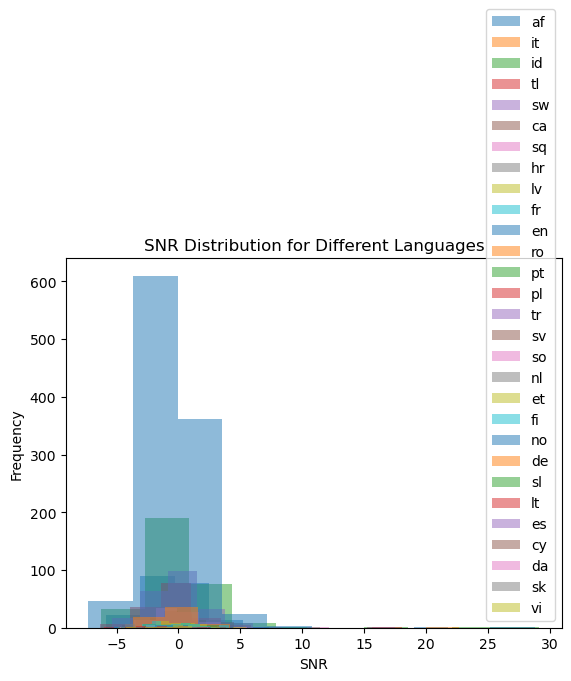

In [12]:
# Create a histogram of SNR values for each language
for language, snr_values in language_snr.items():
    plt.hist(snr_values, bins=10, alpha=0.5, label=language)

plt.xlabel('SNR')
plt.ylabel('Frequency')
plt.title('SNR Distribution for Different Languages')
plt.legend()
plt.show()

In [13]:
import plotly.graph_objects as go

# Create a histogram trace for each language
hist_traces = []
for language, snr_values in language_snr.items():
    hist_trace = go.Histogram(
        x=snr_values,
        nbinsx=10,
        opacity=0.5,
        name=language
    )
    hist_traces.append(hist_trace)

# Create the layout for the histogram
layout = go.Layout(
    title='SNR Distribution for Different Languages',
    xaxis=dict(title='SNR'),
    yaxis=dict(title='Frequency'),
    barmode='overlay'
)

# Create the figure with histogram traces and layout
fig = go.Figure(data=hist_traces, layout=layout)

# Show the interactive histogram
fig.show()

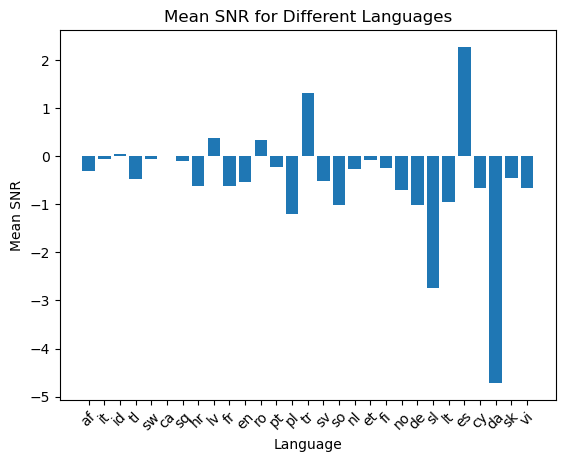

In [14]:
# Calculate mean SNR for each language
mean_snr_values = {language: np.mean(snr_values) for language, snr_values in language_snr.items()}

# Create a bar plot to compare mean SNR values
plt.bar(mean_snr_values.keys(), mean_snr_values.values())
plt.xlabel('Language')
plt.ylabel('Mean SNR')
plt.title('Mean SNR for Different Languages')
plt.xticks(rotation=45)
plt.show()

In [15]:
import plotly.graph_objects as go

# Create a bar trace for mean SNR values
bar_trace = go.Bar(
    x=list(mean_snr_values.keys()),
    y=list(mean_snr_values.values()),
    marker=dict(color='blue')
)

# Create the layout for the bar plot
layout = go.Layout(
    title='Mean SNR for Different Languages',
    xaxis=dict(title='Language'),
    yaxis=dict(title='Mean SNR'),
    showlegend=False
)

# Create the figure with bar trace and layout
fig = go.Figure(data=[bar_trace], layout=layout)

# Show the interactive bar plot
fig.show()

In [16]:
# Perform statistical comparison (e.g., one-way ANOVA)
from scipy.stats import f_oneway

# Extract SNR values for each language
snr_data = [snr_values for language, snr_values in language_snr.items()]

# Perform one-way ANOVA
f_statistic, p_value = f_oneway(*snr_data)
print('One-way ANOVA p-value:', p_value)

One-way ANOVA p-value: 0.038880268167097186


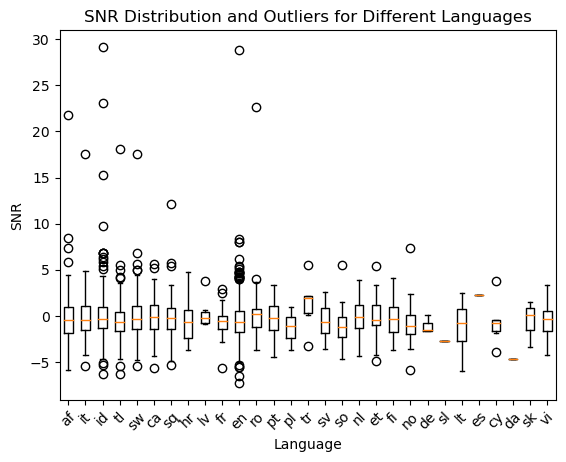

In [17]:
# Identify and visualize outliers using box plots
plt.boxplot(list(language_snr.values()), labels=list(language_snr.keys()))
plt.xlabel('Language')
plt.ylabel('SNR')
plt.title('SNR Distribution and Outliers for Different Languages')
plt.xticks(rotation=45)
plt.show()

In [18]:
import plotly.graph_objects as go

# Create a list of box trace objects for each language
box_traces = []
for language, snr_values in language_snr.items():
    box_trace = go.Box(
        y=snr_values,
        name=language
    )
    box_traces.append(box_trace)

# Create the layout for the box plot
layout = go.Layout(
    title='SNR Distribution and Outliers for Different Languages',
    xaxis=dict(
        title='Language',
        tickangle=-45
    ),
    yaxis=dict(
        title='SNR'
    )
)

# Create the figure with the box traces and layout
figure = go.Figure(data=box_traces, layout=layout)

# Display the interactive plot
figure.show()

In [19]:
# Set the threshold for problematic SNR
threshold = -2.0

# Identify problematic recordings
problematic_recordings = []
for language, snr_values in language_snr.items():
    for snr in snr_values:
        if snr < threshold:
            problematic_recordings.append((language, snr))

# Sort the problematic recordings by SNR in ascending order
problematic_recordings.sort(key=lambda x: x[1])

# Print the top 10 problematic recordings
print("Top 10 Problematic Recordings:")
for i, (language, snr) in enumerate(problematic_recordings[:10]):
    print(f"{i+1}. Language: {language}, SNR: {snr} dB")

Top 10 Problematic Recordings:
1. Language: en, SNR: -7.27400541305542 dB
2. Language: en, SNR: -6.485418081283569 dB
3. Language: tl, SNR: -6.314111351966858 dB
4. Language: id, SNR: -6.274492144584656 dB
5. Language: lt, SNR: -6.032951474189758 dB
6. Language: af, SNR: -5.840967297554016 dB
7. Language: no, SNR: -5.840964913368225 dB
8. Language: ca, SNR: -5.66598653793335 dB
9. Language: fr, SNR: -5.661377906799316 dB
10. Language: en, SNR: -5.588073134422302 dB


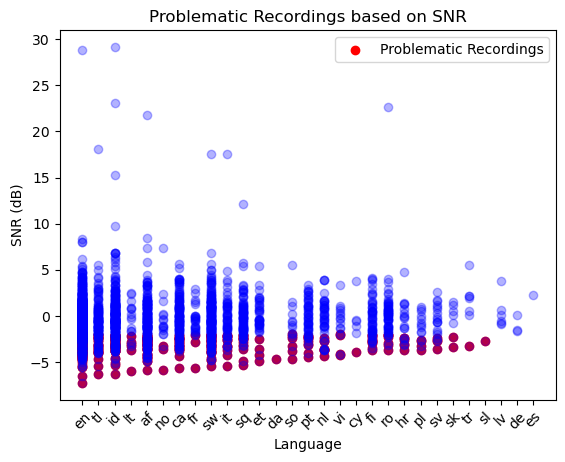

In [20]:
# Extract problematic languages and SNR values
problematic_languages = [record[0] for record in problematic_recordings]
problematic_snr_values = [record[1] for record in problematic_recordings]

# Plot the problematic recordings
plt.scatter(problematic_languages, problematic_snr_values, color='red', label='Problematic Recordings')

# Plot all SNR values
for language, snr_values in language_snr.items():
    plt.scatter([language] * len(snr_values), snr_values, color='blue', alpha=0.3)

plt.xlabel('Language')
plt.ylabel('SNR (dB)')
plt.title('Problematic Recordings based on SNR')
plt.xticks(rotation=45)
plt.legend()
plt.show()


In [21]:
import plotly.express as px

# Create a DataFrame for the problematic recordings
df_problematic = pd.DataFrame(problematic_recordings, columns=['Language', 'SNR'])

# Plot the scatter plot
fig = px.scatter(df_problematic, x='Language', y='SNR', color='Language', hover_data=['SNR'],
                 title='Problematic Recordings based on SNR', labels={'Language': 'Language', 'SNR': 'SNR (dB)'})

# Set the threshold line
fig.add_hline(y=threshold, line_dash='dash', line_color='red', annotation_text='Threshold',
              annotation_position='bottom right')

# Customize layout
fig.update_layout(xaxis={'tickangle': 45})

# Show the interactive plot
fig.show()

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Prepare the Data
X = []
y = []

for language, snr_values in language_snr.items():
    for snr in snr_values:
        X.append([snr])
        y.append(language)

# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Choose a Machine Learning Model (Logistic Regression)
model = LogisticRegression()

# Train the Model
model.fit(X_train, y_train)

# Evaluate the Model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Make Predictions
new_snr_values = [-3.2, -1.5, 0.8]  # Example SNR values for new, unseen data
new_X = [[snr] for snr in new_snr_values]
predictions = model.predict(new_X)
print("Predictions:", predictions)

Accuracy: 0.4035532994923858
Predictions: ['en' 'en' 'en']


C:\Users\sehja\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [23]:
import os
import speech_recognition as sr
import pydub
from pydub import AudioSegment
from tqdm import tqdm
import concurrent.futures
import Levenshtein

# Step 1: Initialize the recognizer
r = sr.Recognizer()

# Step 2: Folder path
folder_path = r"C:\Users\sehja\Downloads\untitled Folder2\archive 11\recordings\recordings"

# Step 3: List all audio files in the folder
audio_files = [file for file in os.listdir(folder_path) if file.endswith(".mp3")]

# Step 4: Set batch size and process files in batches
batch_size = 40  # Define the number of files to process in each batch

total_files = len(audio_files)

# Initialize a list to store the recognized texts
recognized_texts = []

# Define the worker function for parallel processing
def process_audio_file(audio_file):
    # Open the audio file and convert to WAV format
    audio_path = os.path.join(folder_path, audio_file)
    audio = AudioSegment.from_mp3(audio_path)
    wav_path = os.path.splitext(audio_path)[0] + ".wav"
    audio.export(wav_path, format="wav")

    # Read the WAV file
    with sr.AudioFile(wav_path) as source:
        audio = r.record(source)

    # Perform speech recognition
    text = r.recognize_google(audio)

    # Append the recognized text to the list
    recognized_texts.append(text)

    # Delete the temporary WAV file
    os.remove(wav_path)

# Create a thread pool executor
executor = concurrent.futures.ThreadPoolExecutor()

# Iterate over the audio files and process them in parallel
for i in range(0, total_files, batch_size):
    batch_files = audio_files[i:i+batch_size]  # Get the files for the current batch

    # Submit the worker function to the executor for each audio file in the batch
    futures = [executor.submit(process_audio_file, audio_file) for audio_file in batch_files]

    # Wait for all futures to complete
    concurrent.futures.wait(futures)

    if i >= 50:
        break

# Shutdown the executor
executor.shutdown()

original_text = "Please call Stella. Ask her to bring these things with her from the store: Six spoons of fresh snow peas, five thick slabs of blue cheese, and maybe a snack for her brother Bob. We also need a small plastic snake and a big toy frog for the kids. She can scoop these things into three red bags, and we will go meet her Wednesday at the train station."

print("Speech recognition completed for the top 50 audio files.")
print("Recognized Texts:")
for i, text in enumerate(recognized_texts):
    print("Text", i+1, ":", text)
    distance = Levenshtein.distance(original_text, text)
    similarity = 1 - (distance / max(len(original_text), len(text)))
    print("Similarity:", similarity)
    print("---")


Speech recognition completed for the top 50 audio files.
Recognized Texts:
Text 1 : please call Stella ask her to bring these things with her from the store 6 spoons of fresh snow peas 5 thick slabs of Lucchese and maybe a snack for her brother ball we also need a small plastic snake and a big toy frog for the kids she can screw this things and just re-read bags and we will go meet her Wednesday at the train station
Similarity: 0.8796561604584527
---
Text 2 : please call Stella ask her to bring these things with her from the store six points of Fresno peace 56 lots of blue cheese
Similarity: 0.31518624641833815
---
Text 3 : please call Stella ask her to bring these things with her with her from the store 6 spoons of fresh snow peas
Similarity: 0.27507163323782235
---
Text 4 : please call Stella ask her to bring these things with her from the store 6 spoons of fresh snow peas 5 big slabs of blue cheese and maybe a snack for her brother Bob we also need a small plastic snake and a big to

In [24]:
import Levenshtein

# ...

# Calculate the similarity scores
similarity_scores = []
for text in recognized_texts:
    distance = Levenshtein.distance(original_text, text)
    similarity = 1 - (distance / max(len(original_text), len(text)))
    similarity_scores.append(similarity)

# Calculate the average similarity
average_similarity = sum(similarity_scores) / len(similarity_scores)

print("Average Similarity:", average_similarity)


Average Similarity: 0.6306635802621423


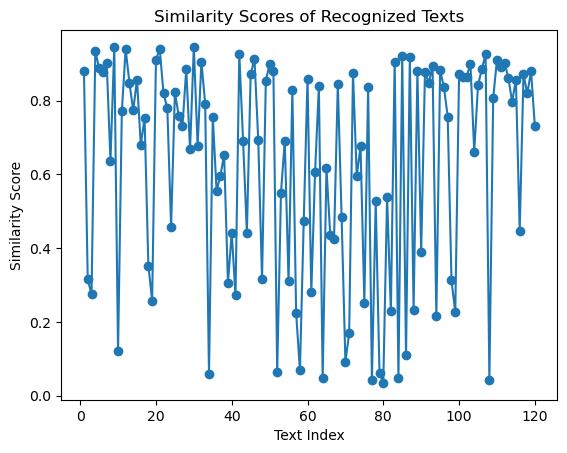

In [25]:
import matplotlib.pyplot as plt

# Plot the similarity scores
plt.plot(range(1, len(similarity_scores) + 1), similarity_scores, marker='o')
plt.xlabel('Text Index')
plt.ylabel('Similarity Score')
plt.title('Similarity Scores of Recognized Texts')
plt.show()

In [26]:
import plotly.graph_objects as go

# Convert the range object to a list
x_values = list(range(1, len(similarity_scores) + 1))

# Create a scatter plot with interactive tooltips
fig = go.Figure(data=go.Scatter(x=x_values,
                               y=similarity_scores,
                               mode='markers',
                               marker=dict(size=8),
                               hovertext=[f"Text {i+1}<br>Similarity: {score}" for i, score in enumerate(similarity_scores)],
                               hoverinfo='text'))

# Add axis labels and title
fig.update_layout(xaxis_title='Text Index',
                  yaxis_title='Similarity Score',
                  title='Similarity Scores of Recognized Texts')

# Show the interactive plot
fig.show()

In [27]:
!pip install pronouncing

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 939.3/939.3 kB 1.9 MB/s eta 0:00:00
  Using cached importlib_resources-5.12.0-py3-none-any.whl (36 kB)
  Created wheel for pronouncing: filename=pronouncing-0.2.0-py2.py3-none-any.whl size=6260 sha256=685c76c4a6d99c92d50d620b7a20c692cf7381352b4182987cc0a7907a462d7e
  Stored in directory: c:\users\sehja\appdata\local\pip\cache\wheels\e4\61\dc\8697e3dcb8b4b237d869bf749900c19f3332a9eed961ae73cc
Successfully built pronouncing
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 6.6.0
    Uninstalling importlib-metadata-6.6.0:
      Successfully uninstalled importlib-metadata-6.6.0


In [28]:
import pronouncing

In [83]:
import pronouncing

original_words = original_text.lower().split()
original_phonemes = []

# Retrieve phonemes for original words
for word in original_words:
    phonemes = pronouncing.phones_for_word(word)
    if phonemes:
        original_phonemes.append(phonemes[0])  # Store the first pronunciation if multiple are available
    else:
        original_phonemes.append(None)  # No pronunciation found

# Print the original phonemes
print("Original Phonemes:", original_phonemes)

Original Phonemes: ['P L IY1 Z', 'K AO1 L', None, 'AE1 S K', 'HH ER1', 'T UW1', 'B R IH1 NG', 'DH IY1 Z', 'TH IH1 NG Z', 'W IH1 DH', 'HH ER1', 'F R AH1 M', 'DH AH0', None, 'S IH1 K S', 'S P UW1 N Z', 'AH1 V', 'F R EH1 SH', 'S N OW1', None, 'F AY1 V', 'TH IH1 K', 'S L AE1 B Z', 'AH1 V', 'B L UW1', None, 'AH0 N D', 'M EY1 B IY0', 'AH0', 'S N AE1 K', 'F AO1 R', 'HH ER1', 'B R AH1 DH ER0', None, 'W IY1', 'AO1 L S OW0', 'N IY1 D', 'AH0', 'S M AO1 L', 'P L AE1 S T IH0 K', 'S N EY1 K', 'AH0 N D', 'AH0', 'B IH1 G', 'T OY1', 'F R AA1 G', 'F AO1 R', 'DH AH0', None, 'SH IY1', 'K AE1 N', 'S K UW1 P', 'DH IY1 Z', 'TH IH1 NG Z', 'IH1 N T UW0', 'TH R IY1', 'R EH1 D', None, 'AH0 N D', 'W IY1', 'W IH1 L', 'G OW1', 'M IY1 T', 'HH ER1', 'W EH1 N Z D IY0', 'AE1 T', 'DH AH0', 'T R EY1 N', None]


In [84]:
import pronouncing

# Initialize lists to store recognized phonemes
recognized_phonemes = []

# Retrieve phonemes for recognized words
for text in recognized_texts:
    recognized_words = text.lower().split()
    phonemes = []
    for word in recognized_words:
        word_phonemes = pronouncing.phones_for_word(word)
        if word_phonemes:
            phonemes.append(word_phonemes[0])  # Store the first pronunciation if multiple are available
        else:
            phonemes.append(None)  # No pronunciation found
    recognized_phonemes.append(phonemes)

# Print the recognized phonemes
for i, phonemes in enumerate(recognized_phonemes):
    print("Text", i+1, ":")
    print("Recognized Phonemes:", phonemes)
    print("---")

Text 1 :
Recognized Phonemes: ['P L IY1 Z', 'K AO1 L', 'S T EH1 L AH0', 'AE1 S K', 'HH ER1', 'T UW1', 'B R IH1 NG', 'DH IY1 Z', 'TH IH1 NG Z', 'W IH1 DH', 'HH ER1', 'F R AH1 M', 'DH AH0', 'S T AO1 R', None, 'S P UW1 N Z', 'AH1 V', 'F R EH1 SH', 'S N OW1', 'P IY1 Z', None, 'TH IH1 K', 'S L AE1 B Z', 'AH1 V', 'L UW0 K EY1 Z IY0', 'AH0 N D', 'M EY1 B IY0', 'AH0', 'S N AE1 K', 'F AO1 R', 'HH ER1', 'B R AH1 DH ER0', 'B AO1 L', 'W IY1', 'AO1 L S OW0', 'N IY1 D', 'AH0', 'S M AO1 L', 'P L AE1 S T IH0 K', 'S N EY1 K', 'AH0 N D', 'AH0', 'B IH1 G', 'T OY1', 'F R AA1 G', 'F AO1 R', 'DH AH0', 'K IH1 D Z', 'SH IY1', 'K AE1 N', 'S K R UW1', 'DH IH1 S', 'TH IH1 NG Z', 'AH0 N D', 'JH AH1 S T', None, 'B AE1 G Z', 'AH0 N D', 'W IY1', 'W IH1 L', 'G OW1', 'M IY1 T', 'HH ER1', 'W EH1 N Z D IY0', 'AE1 T', 'DH AH0', 'T R EY1 N', 'S T EY1 SH AH0 N']
---
Text 2 :
Recognized Phonemes: ['P L IY1 Z', 'K AO1 L', 'S T EH1 L AH0', 'AE1 S K', 'HH ER1', 'T UW1', 'B R IH1 NG', 'DH IY1 Z', 'TH IH1 NG Z', 'W IH1 DH', 'HH 

In [85]:
import Levenshtein

def compare_phonemes(recognized_phonemes, original_phonemes):
    phonetic_similarity_scores = []
    
    for rec_phonemes, orig_phonemes in zip(recognized_phonemes, original_phonemes):
        if rec_phonemes and orig_phonemes:
            rec_phonemes = [phoneme for phoneme in rec_phonemes if phoneme is not None]
            orig_phonemes = [phoneme for phoneme in orig_phonemes if phoneme is not None]
            
            distance = Levenshtein.distance(" ".join(rec_phonemes), " ".join(orig_phonemes))
            similarity = 1 - (distance / max(len(rec_phonemes), len(orig_phonemes)))
            phonetic_similarity_scores.append(similarity)
    
    return phonetic_similarity_scores

similarity_scores = compare_phonemes(recognized_phonemes, original_phonemes)
print("Similarity Scores:", similarity_scores)


Similarity Scores: [-7.846153846153847, -7.6521739130434785, -7.761194029850746, -7.970149253731343, -7.898550724637682, -7.710144927536232, -7.854166666666666, -7.656716417910447, -6.25, -8.317460317460318, -7.787878787878787, -7.7857142857142865, -7.685714285714285, -7.76, -7.876923076923077, -7.333333333333334, -7.888888888888889, -7.779411764705882, -7.985074626865671, -7.737704918032787, -7.685714285714285, -7.597014925373134, -8.102941176470589, -7.617647058823529, -8.0, -7.7164179104477615, -7.75, -7.7142857142857135, -7.587301587301587, -7.709677419354838, -7.813953488372093, -7.781818181818181, -7.936170212765957, -7.181818181818182, -6.666666666666667, -7.2631578947368425, -7.757575757575758, -7.75, -8.028571428571428, -7.8125, -7.705882352941176, -7.803921568627452, -7.4, -7.8125, -7.78125, -1.3333333333333335, -7.290909090909091, -7.545454545454545, -7.6, -7.636363636363637, -7.4, -7.583333333333334, -7.940298507462687, -7.947368421052632, -7.895833333333334, -7.81159420289

Average Similarity: -7.504098848726257

Phoneme Pair with Maximum Similarity: (['P L IY1 Z', 'K AO1 L', 'S T EH1 L AH0', 'AE1 S K', 'HH ER1', 'T UW1', 'B R IH1 NG', 'DH IY1 Z', 'TH IH1 NG Z', 'W IH1 DH', 'HH ER1', 'F R AH1 M', 'DH AH0', 'S T AO1 R', 'S IH1 K S', 'P OY1 N T S', 'AH1 V', 'F R EH1 SH', 'S N OW1', 'P IY1 Z', None, 'S L AE1 B Z', 'AH1 V', 'B L UW1', 'CH IY1 Z', 'AH0 N D', 'M EY1 B IY0', 'AH0', 'S N AE1 K', 'F AO1 R', 'HH ER1', 'B R AH1 DH ER0', 'B AA1 B', 'W IY1', 'AO1 L S OW0', 'N IY1 D', 'AH0', 'S M AO1 L', 'P L AE1 S T IH0 K', 'S N EY1 K', 'AH0 N D', 'AH0', 'B IH1 G', 'T OY1', 'F R AA1 G', 'F AO1 R', 'DH AH0', 'K IH1 D Z', 'SH IY1', 'K AE1 N', 'S K UW1 P', 'DH IY1 Z', 'TH IH1 NG Z', 'IH1 N T UW0', 'DH AH0', 'TH R IY1', 'R EH1 D', 'B AE1 G Z', 'AH0 N D', 'W IY1', 'W IH1 L', 'G OW1', 'M IY1 T', 'HH ER1', 'W EH1 N Z D IY0', 'AE1 T', 'DH AH0', 'T R EY1 N', 'S T EY1 SH AH0 N'], 'F R AA1 G')

Phoneme Pair with Minimum Similarity: (['P L IY1 Z', 'K AO1 L', 'S T EH1 L AH0', 'S N

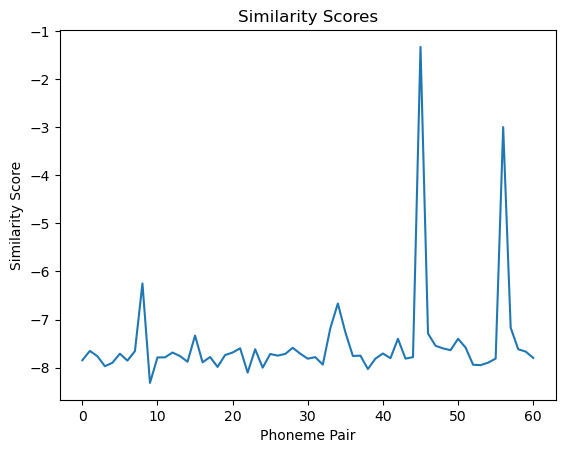

In [90]:
# Calculate the average similarity
average_similarity = sum(similarity_scores) / len(similarity_scores)
print("Average Similarity:", average_similarity)

# Determine the phoneme pair with the highest similarity score
max_similarity_index = similarity_scores.index(max(similarity_scores))
max_similarity_pair = (recognized_phonemes[max_similarity_index], original_phonemes[max_similarity_index])
print("\nPhoneme Pair with Maximum Similarity:", max_similarity_pair)

# Determine the phoneme pair with the lowest similarity score
min_similarity_index = similarity_scores.index(min(similarity_scores))
min_similarity_pair = (recognized_phonemes[min_similarity_index], original_phonemes[min_similarity_index])
print("\nPhoneme Pair with Minimum Similarity:", min_similarity_pair)

# Visualize the similarity scores on a graph
import matplotlib.pyplot as plt

plt.plot(similarity_scores)
plt.xlabel("Phoneme Pair")
plt.ylabel("Similarity Score")
plt.title("Similarity Scores")
plt.show()

In [91]:
import plotly.graph_objects as go

# Create a scatter plot
fig = go.Figure(data=go.Scatter(x=list(range(len(similarity_scores))), y=similarity_scores, mode='lines'))

# Customize the layout
fig.update_layout(
    title="Similarity Scores",
    xaxis_title="Phoneme Pair",
    yaxis_title="Similarity Score"
)

# Display the interactive graph
fig.show()

In [100]:
original_word_count = len(original_text.split())
print("Word Count of Original Text:", original_word_count)

Word Count of Original Text: 69


In [99]:
print("Speech recognition completed for the top 50 audio files.")
print("Recognized Texts:")

for i, text in enumerate(recognized_texts):
    # Count the number of words in the recognized text
    words = text.split()
    word_count = len(words)

    # Print the word count for each text
    print("Text", i+1, "Word Count:", word_count)

Speech recognition completed for the top 50 audio files.
Recognized Texts:
Text 1 Word Count: 68
Text 2 Word Count: 24
Text 3 Word Count: 22
Text 4 Word Count: 69
Text 5 Word Count: 68
Text 6 Word Count: 71
Text 7 Word Count: 70
Text 8 Word Count: 50
Text 9 Word Count: 69
Text 10 Word Count: 8
Text 11 Word Count: 64
Text 12 Word Count: 68
Text 13 Word Count: 72
Text 14 Word Count: 63
Text 15 Word Count: 71
Text 16 Word Count: 52
Text 17 Word Count: 69
Text 18 Word Count: 27
Text 19 Word Count: 18
Text 20 Word Count: 67
Text 21 Word Count: 69
Text 22 Word Count: 70
Text 23 Word Count: 64
Text 24 Word Count: 37
Text 25 Word Count: 70
Text 26 Word Count: 72
Text 27 Word Count: 70
Text 28 Word Count: 69
Text 29 Word Count: 55
Text 30 Word Count: 69
Text 31 Word Count: 52
Text 32 Word Count: 72
Text 33 Word Count: 66
Text 34 Word Count: 3
Text 35 Word Count: 65
Text 36 Word Count: 45
Text 37 Word Count: 57
Text 38 Word Count: 49
Text 39 Word Count: 23
Text 40 Word Count: 43
Text 41 Word Cou

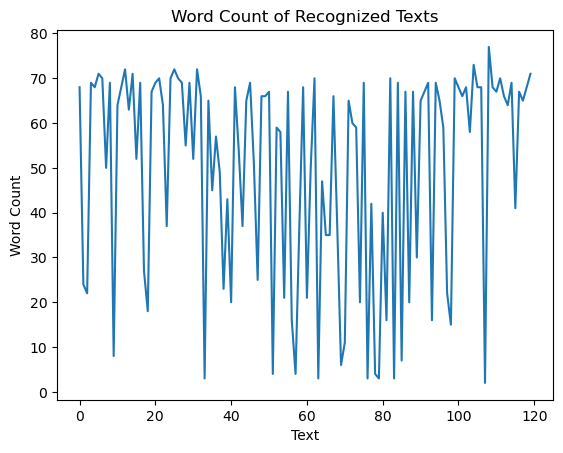

In [103]:
import matplotlib.pyplot as plt

# Create a list of word counts
word_counts = [len(text.split()) for text in recognized_texts]

# Plot the word count for each recognized text
plt.plot(word_counts)
plt.xlabel("Text")
plt.ylabel("Word Count")
plt.title("Word Count of Recognized Texts")
plt.show()


In [105]:
import plotly.graph_objects as go

# Create a list of word counts
word_counts = [len(text.split()) for text in recognized_texts]

# Create a scatter plot of word count
fig = go.Figure(data=go.Scatter(x=list(range(1, len(word_counts) + 1)), y=word_counts, mode='markers'))

# Customize the layout
fig.update_layout(
    title="Word Count of Recognized Texts",
    xaxis_title="Text",
    yaxis_title="Word Count",
    hovermode="closest"
)

# Add hover text with word count
fig.update_traces(
    hovertemplate='Text: %{x}<br>Word Count: %{y}'
)

# Show the plot
fig.show()

In [116]:
import os
import langdetect

# Folder path
folder_path = r"C:\Users\sehja\Downloads\untitled Folder2\archive 11\recordings\recordings"

# Initialize a dictionary to store the language counts
language_counts = {}

# Iterate over files in the folder
for filename in os.listdir(folder_path):
    # Check if the file is an MP3 audio file
    if filename.endswith(".mp3"):
        # Determine the language of the file name
        language = langdetect.detect(filename)

        # Increment the count for the language in the dictionary
        language_counts[language] = language_counts.get(language, 0) + 1

# Sort the language counts in descending order
sorted_counts = sorted(language_counts.items(), key=lambda x: x[1], reverse=True)

# Print the top 10 languages
print("Languages:")
for language, count in sorted_counts:
    print(f"Language: {language}, Count: {count}")


Top 10 Languages:
Language: en, Count: 882
Language: id, Count: 303
Language: tl, Count: 132
Language: ca, Count: 126
Language: sq, Count: 93
Language: sw, Count: 71
Language: af, Count: 69
Language: ro, Count: 69
Language: it, Count: 60
Language: pt, Count: 53
Language: fi, Count: 52
Language: et, Count: 40
Language: nl, Count: 34
Language: fr, Count: 26
Language: hr, Count: 22
Language: no, Count: 18
Language: lt, Count: 18
Language: vi, Count: 15
Language: pl, Count: 14
Language: sv, Count: 11
Language: tr, Count: 8
Language: sk, Count: 7
Language: lv, Count: 6
Language: cy, Count: 6
Language: so, Count: 2
Language: da, Count: 1


In [140]:
import os
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical

# Folder path for audio files
folder_path = r"C:\Users\sehja\Downloads\untitled Folder2\archive 11\recordings\recordings"

# Define the list of target languages and their corresponding labels
languages = ['en', 'id', 'tl', 'ca', 'sq', 'sw', 'af', 'ro', 'it', 'pt','fi','et',
             'nl','fr','hr','no','lt','vi','pl','sv','tr','sk','lv','cy','so','da',
             'ag','ak','al','am','ar','be','as','az','ba','bg','bm','bn','bo','bu','br','bs','ca','ch','co','cr',
             'ce','cs','cy','da','de','el','en','eo','es','et','eu','cz','di','du','eb','ed','es','ew','fa','ga','pu','ge',
             'ge','gr','gu','ha','hi','hm','hu','ib','ic','if','ig','il','in','ir','ja','jo','ka','kh','ki','ko','kr','ku',
             'la','li','lu','ma','me','mi','mo','na','ne','ng','nu','or','po','pa','qu','ru','rw','sa','se','sh','si','sl','he',
             'sp','su','sy','ta','te','th','ti','ts','tu','tw','uk','ur','uy','uz','vl','wo','wu','xa','xi','ya','yu','yi','yo','zu']
             

language_labels = {lang: i for i, lang in enumerate(languages)}

# Initialize empty lists to store features and labels
features = []
labels = []

# Iterate over audio files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".mp3"):
        # Load audio file
        audio_path = os.path.join(folder_path, filename)
        audio, sr = librosa.load(audio_path, duration=3)  # Adjust duration as needed

        # Extract audio features (Mel spectrogram)
        mel_spec = librosa.feature.melspectrogram(y=audio, sr=sr)
        
        # Reshape the feature matrix to a fixed size if necessary
        desired_length = 128
        if mel_spec.shape[1] < desired_length:
            mel_spec = np.pad(mel_spec, ((0, 0), (0, desired_length - mel_spec.shape[1])), mode='constant')
        else:
            mel_spec = mel_spec[:, :desired_length]
        
        # Append the features and corresponding label to the lists
        features.append(mel_spec)
        label = filename[:2]
        if label in language_labels:
            labels.append(language_labels[label])
        else:
            print(f"Warning: Language label '{label}' not found in the language_labels dictionary.")

# Convert lists to numpy arrays
features = np.array(features)
labels = np.array(labels)

# Perform one-hot encoding of labels
labels = to_categorical(labels)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Define the CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(mel_spec.shape[0], mel_spec.shape[1], 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(len(languages), activation="softmax"))

# Compile and train the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
54/54 [==============================] - 10s 169ms/step - loss: 48.7624 - accuracy: 0.1234 - val_loss: 18.3011 - val_accuracy: 0.1051
Epoch 2/10
54/54 [==============================] - 9s 165ms/step - loss: 1.9732 - accuracy: 0.5988 - val_loss: 12.2126 - val_accuracy: 0.2009
Epoch 3/10
54/54 [==============================] - 9s 163ms/step - loss: 0.3774 - accuracy: 0.9117 - val_loss: 13.9785 - val_accuracy: 0.2126
Epoch 4/10
54/54 [==============================] - 9s 161ms/step - loss: 0.1528 - accuracy: 0.9719 - val_loss: 16.1764 - val_accuracy: 0.2220
Epoch 5/10
54/54 [==============================] - 9s 162ms/step - loss: 0.0694 - accuracy: 0.9942 - val_loss: 18.0412 - val_accuracy: 0.2383
Epoch 6/10
54/54 [==============================] - 9s 163ms/step - loss: 0.0379 - accuracy: 0.9965 - val_loss: 18.8050 - val_accuracy: 0.2313
Epoch 7/10
54/54 [==============================] - 9s 164ms/step - loss: 0.0210 - accuracy: 0.9982 - val_loss: 20.7192 - val_accuracy: 0.23

In [186]:
import os
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import RMSprop
from keras.utils import to_categorical

# Folder path for audio files
folder_path = r"C:\Users\sehja\Downloads\untitled Folder2\archive 11\recordings\recordings"

# Define the list of target languages and their corresponding labels
languages = ['en', 'id', 'tl', 'ca', 'sq', 'sw', 'af', 'ro', 'it', 'pt','fi','et',
             'nl','fr','hr','no','lt','vi','pl','sv','tr','sk','lv','cy','so','da',
             'ag','ak','al','am','ar','be','as','az','ba','bg','bm','bn','bo','bu','br','bs','ca','ch','co','cr',
             'ce','cs','cy','da','de','el','en','eo','es','et','eu','cz','di','du','eb','ed','es','ew','fa','ga','pu','ge',
             'ge','gr','gu','ha','hi','hm','hu','ib','ic','if','ig','il','in','ir','ja','jo','ka','kh','ki','ko','kr','ku',
             'la','li','lu','ma','me','mi','mo','na','ne','ng','nu','or','po','pa','qu','ru','rw','sa','se','sh','si','sl','he',
             'sp','su','sy','ta','te','th','ti','ts','tu','tw','uk','ur','uy','uz','vl','wo','wu','xa','xi','ya','yu','yi','yo','zu']

language_labels = {lang: i for i, lang in enumerate(languages)}

# Initialize empty lists to store features and labels
features = []
labels = []

# Iterate over audio files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".mp3"):
        # Load audio file
        audio_path = os.path.join(folder_path, filename)
        audio, sr = librosa.load(audio_path, duration=3)  # Adjust duration as needed

        # Extract audio features (Mel spectrogram)
        mel_spec = librosa.feature.melspectrogram(y=audio, sr=sr)
        
        # Reshape the feature matrix to a fixed size if necessary
        desired_length = 128
        if mel_spec.shape[1] < desired_length:
            mel_spec = np.pad(mel_spec, ((0, 0), (0, desired_length - mel_spec.shape[1])), mode='constant')
        else:
            mel_spec = mel_spec[:, :desired_length]
        
        # Append the features and corresponding label to the lists
        features.append(mel_spec)
        label = filename[:2]
        if label in language_labels:
            labels.append(language_labels[label])
        else:
            print(f"Warning: Language label '{label}' not found in the language_labels dictionary.")

# Convert lists to numpy arrays
features = np.array(features)
labels = np.array(labels)

# Perform one-hot encoding of labels
labels = to_categorical(labels)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Define the CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(mel_spec.shape[0], mel_spec.shape[1], 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(len(languages), activation="softmax"))

# Compile and train the model
optimizer = RMSprop(learning_rate=0.001)
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
54/54 [==============================] - 16s 281ms/step - loss: 7.3731 - accuracy: 0.1713 - val_loss: 3.8212 - val_accuracy: 0.2710
Epoch 2/10
54/54 [==============================] - 15s 271ms/step - loss: 3.7465 - accuracy: 0.2626 - val_loss: 3.5784 - val_accuracy: 0.2617
Epoch 3/10
54/54 [==============================] - 15s 270ms/step - loss: 3.3109 - accuracy: 0.2871 - val_loss: 3.5592 - val_accuracy: 0.2664
Epoch 4/10
54/54 [==============================] - 14s 268ms/step - loss: 2.8882 - accuracy: 0.3392 - val_loss: 3.7328 - val_accuracy: 0.2500
Epoch 5/10
54/54 [==============================] - 14s 266ms/step - loss: 2.2773 - accuracy: 0.4456 - val_loss: 4.2625 - val_accuracy: 0.2430
Epoch 6/10
54/54 [==============================] - 15s 271ms/step - loss: 1.8214 - accuracy: 0.5503 - val_loss: 4.6344 - val_accuracy: 0.2313
Epoch 7/10
54/54 [==============================] - 15s 272ms/step - loss: 1.3868 - accuracy: 0.6591 - val_loss: 5.1545 - val_accuracy: 0.2336

In [199]:
import os
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
from keras import callbacks
from keras.regularizers import l2
from keras.layers import Dropout
from keras import callbacks
from keras.regularizers import l2
from keras.layers import Dropout

# Define the CNN model
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), activation="relu", input_shape=(mel_spec.shape[0], mel_spec.shape[1], 1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation="relu"))
model.add(Conv2D(128, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation="relu", kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(len(languages), activation="softmax"))

# Compile and train the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Implement early stopping
early_stopping = callbacks.EarlyStopping(monitor="val_loss", patience=3, verbose=1)

# Train the model with adjusted hyperparameters
model.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=20,
    validation_data=(X_test, y_test)
)


Epoch 1/20
54/54 [==============================] - 65s 1s/step - loss: 5.6065 - accuracy: 0.1947 - val_loss: 3.9099 - val_accuracy: 0.2734
Epoch 2/20
54/54 [==============================] - 60s 1s/step - loss: 3.8453 - accuracy: 0.2696 - val_loss: 3.7380 - val_accuracy: 0.2640
Epoch 3/20
54/54 [==============================] - 58s 1s/step - loss: 3.5860 - accuracy: 0.2743 - val_loss: 3.7495 - val_accuracy: 0.2710
Epoch 4/20
54/54 [==============================] - 58s 1s/step - loss: 3.2328 - accuracy: 0.3123 - val_loss: 3.8159 - val_accuracy: 0.2640
Epoch 5/20
54/54 [==============================] - 58s 1s/step - loss: 2.8737 - accuracy: 0.3807 - val_loss: 4.2148 - val_accuracy: 0.2664
Epoch 6/20
54/54 [==============================] - 58s 1s/step - loss: 2.3394 - accuracy: 0.4883 - val_loss: 5.2785 - val_accuracy: 0.2593
Epoch 7/20
54/54 [==============================] - 58s 1s/step - loss: 1.9753 - accuracy: 0.5673 - val_loss: 5.9324 - val_accuracy: 0.2407
Epoch 8/20
54/54 [==